## Softmax

In [ ]:
# Aplicar la función softmax
def softmax(x):
  """Compute softmax values for each set of scores in x."""
  return np.exp(x) / np.sum(np.exp(x), axis=0)

Logits: [ 3.5  4.  -2. ]
Probabilidades: [0.37695905 0.6215004  0.00154055]
Suma de Probabilidades: 0.9999999999999999


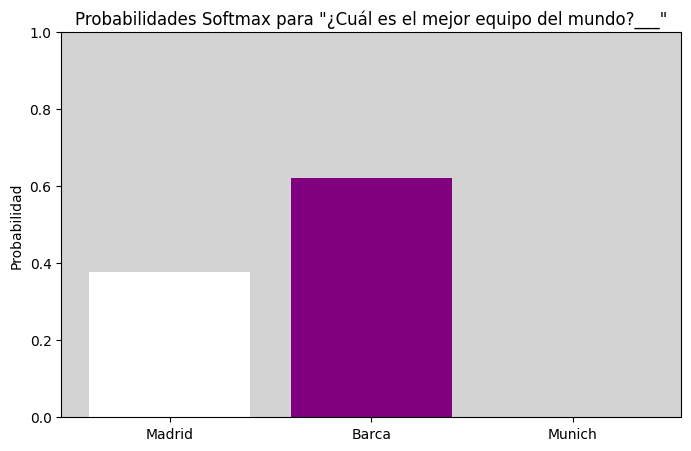

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo input: resultados Madrid, Barça y Bayern de Munich

logits = np.array([3.5, 4, -2.0])

probabilities = softmax(logits)

print("Logits:", logits)
print("Probabilidades:", probabilities)
print("Suma de Probabilidades:", np.sum(probabilities))

# Visualización de probabilidades
teams = ['Madrid', 'Barca', 'Munich']
colors = ['white', 'purple', 'red'] # Define los colores para cada equipo

plt.figure(figsize=(8, 5))
ax = plt.gca() # aplicar los axes
ax.set_facecolor('lightgray') # Aplicar el color del background
plt.bar(teams, probabilities, color=colors) # Usar los colores definidos
plt.ylabel('Probabilidad')
plt.title('Probabilidades Softmax para "¿Cuál es el mejor equipo del mundo?___"')
plt.ylim(0, 1) # Las probabilidades son entre 0 y 1
plt.show()

### Overfitting/Underfitting en TensorFlow

Crea un ejemplo de entreno/validación graficos de perdidas y accuracy para underfitting, overfitting y un buen modelo usando los digitos del sample set.

### Cargar y preparar los datos

Subsatck:

Cargar un conjunto de datos adecuado para la clasificación (como el conjunto de díitos) y dividirlo en conjuntos de entrenamiento y validación.

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(X_train, y_train), (X_val, y_val) = mnist.load_data()

# Preprocess the data: flatten the images and normalize pixel values
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_val = X_val.reshape(-1, 28*28).astype('float32') / 255.0

# Use a smaller sample of the data
sample_size = 150  # You can adjust this number


X_train = X_train[:sample_size]
y_train = y_train[:sample_size]
X_val = X_val[:int(sample_size * 0.2)] # Use a smaller validation set as well
y_val = y_val[:int(sample_size * 0.2)]


print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

Training data shape: (150, 784)
Validation data shape: (30, 784)
Training labels shape: (150,)
Validation labels shape: (30,)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


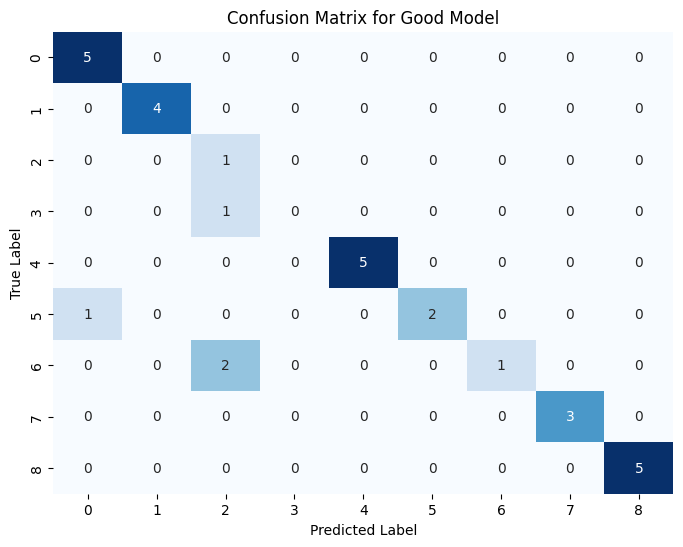

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the classes for the validation set using the good model
y_pred_good = np.argmax(model_good.predict(X_val), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_good)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Good Model')
plt.show()

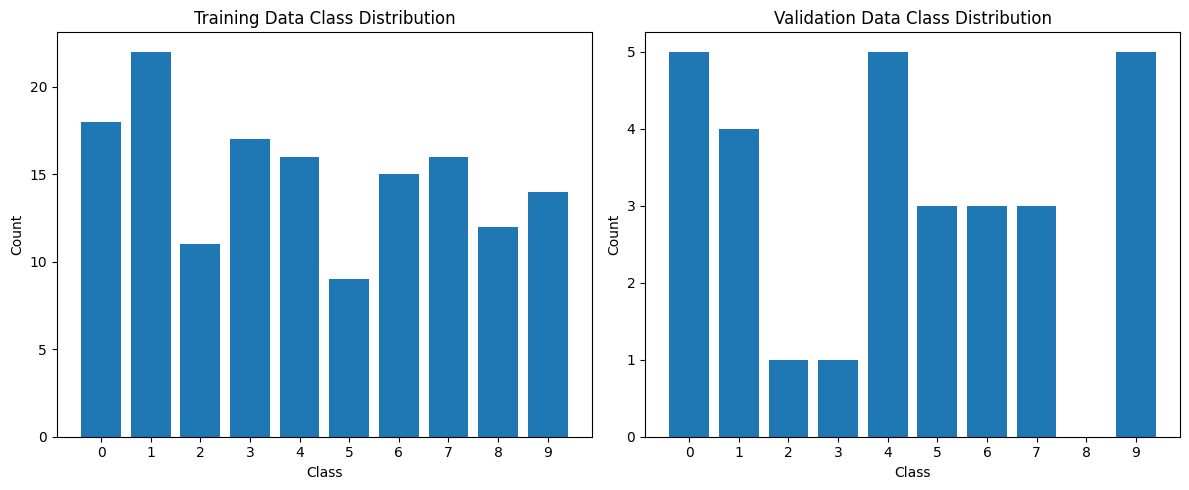

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get class counts for training data
train_class_counts = np.bincount(y_train)
train_classes = np.arange(len(train_class_counts))

# Get class counts for validation data
val_class_counts = np.bincount(y_val)
val_classes = np.arange(len(val_class_counts))

# Create subplots for better visualization
plt.figure(figsize=(12, 5))

# Plot training data distribution
plt.subplot(1, 2, 1)
plt.bar(train_classes, train_class_counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Data Class Distribution")
plt.xticks(train_classes)

# Plot validation data distribution
plt.subplot(1, 2, 2)
plt.bar(val_classes, val_class_counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Validation Data Class Distribution")
plt.xticks(val_classes)

plt.tight_layout()
plt.show()

### Crear modelos con diferentes complejidades

Substack:

Definir tres modelos de red neuronal con diferentes arquitecturas para representar underfitting (modelo simple), overfitting (modelo complejo) y un buen modelo (modelo con complejidad intermedia y/o técnicas de regularización).

In [ ]:
# 1, Importación de librerías
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# 2. Definimos el "underfitting model": Será underfitting porque la arquitectura es demasiado simple para capturar patrones del conjunto de datos. (pocas neuronas con activación relu con una sola capa oculta)
# Si los datos tienen muchas variables (featrues) o relaciones no lineales, 2 neuronas no son suficientes para aprenderlas (muy pocos parámetros (pesos))
model_underfitting = Sequential([
    Dense(2, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='softmax') # softmax: Capa de red neuronal se usa para convertir las salidas de la capa en probabilidades, para problemas multiclase
] )

# 3. Definir el "overfitting model": En caso de que nuestro dataset sea pequeño, es overfitting puesto que tiene demasiados parámetros (1000 neuronas) en la primera capa
# Si el dataset no es muy grande, el modelo tiene más parámetros que datos, por lo que memoriza el conjutno de entrenamiento (overfitting)
model_overfitting = Sequential([
                Dense(1000, activation='relu', input_shape=(X_train.shape[1],)),
                Dense(10, activation='softmax')
])

# 4. Defiir el modelo correcto con regularization: tiene capas suficientes (3 capas con 64 y 32 neuronas, para aprender patrones complejos). No es demsiado grande. e ingluye técncias de regularización.
model_good = Sequential([
                Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                Dropout(0.3), # Capa Dropuout, téncica de regulraización, apagaga alateroiamente el 30% de las neuronas en cada paso
                Dense(32, activation='relu', kernel_regularizer=l2(0.001)), # kernel_regularizar, penaliza pesos grandes, obligando a la red a aprender de manera más simple y general.
                Dense(10, activation='softmax')
])

# 5. Compileamos cada modelo
model_underfitting.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

model_overfitting.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

model_good.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_underfitting.summary()
model_overfitting.summary()
model_good.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,600 (6.25 KB)

 Trainable params: 1,600 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar los modelos

Subtask:

Entrenar cada uno de los tres modelos en los datos de entrenamiento, registrando la pérdida y la precisión tanto para el conjunto de entrenamiento como para el de validación en cada época.

In [ ]:
epochs = 30 # Define the number of epochs

history_underfitting = model_underfitting.fit(X_train, y_train, epochs=epochs,
                                              validation_data=(X_val, y_val), verbose=0)
history_overfitting = model_overfitting.fit(X_train, y_train, epochs=epochs,
                                            validation_data=(X_val, y_val), verbose=0)
history_good = model_good.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val),
                              verbose=0)

print("Training complete for all models.")

Training complete for all models.


### Visualizar los resultados

Subtask:

Crear gráficos que muestren la pérdida y la precisión de entrenamiento y validación a lo largo de las épocas para cada uno de los tres modelos

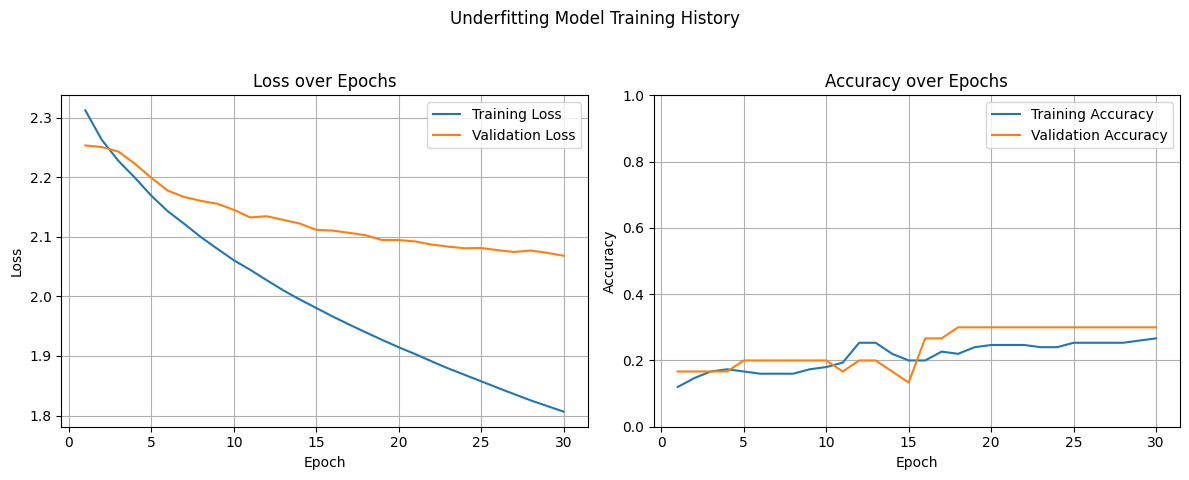

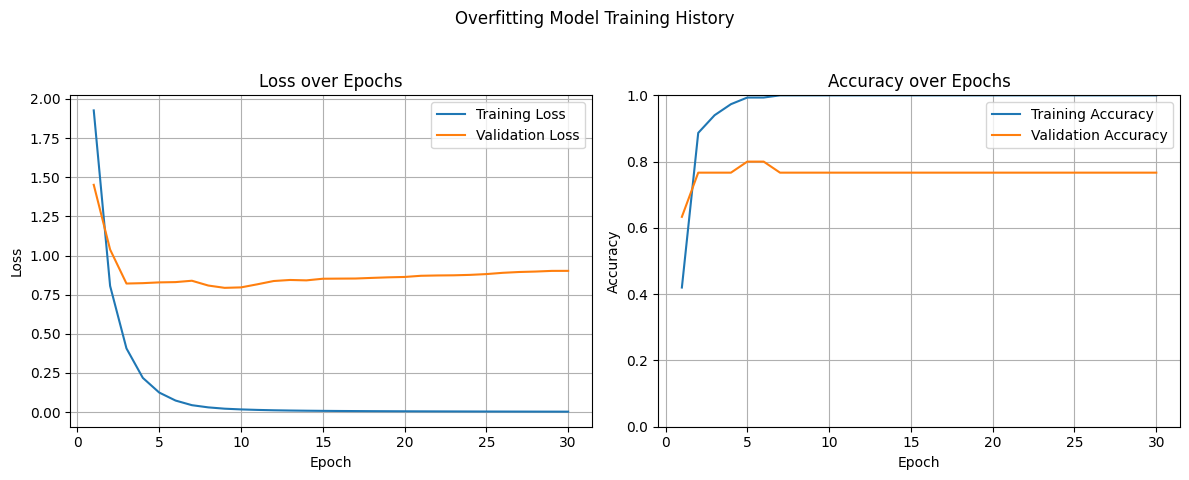

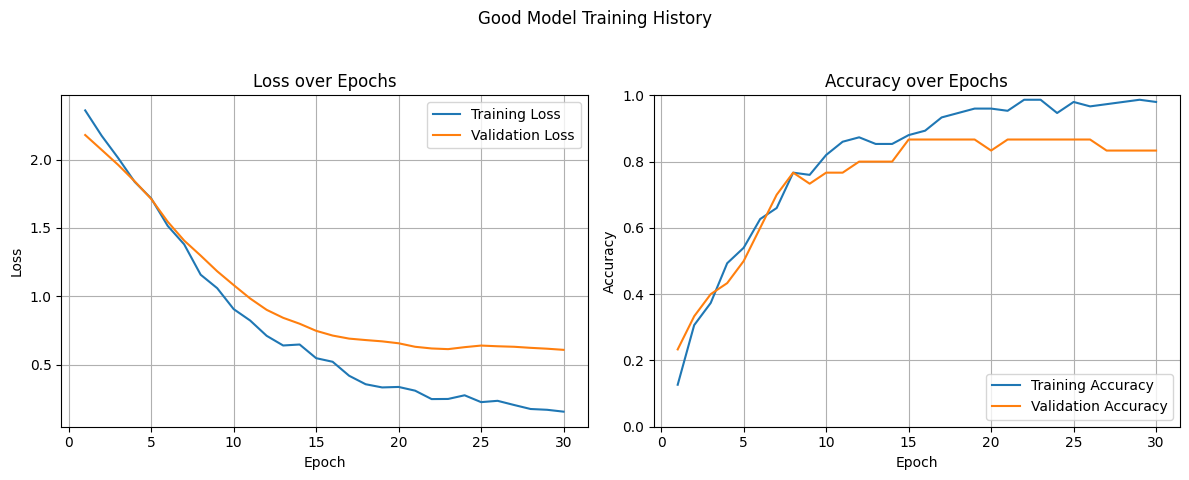

In [ ]:
def plot_training_history(history, title, epochs=None):
    """
    Plots the training and validation loss and accuracy over epochs.

    Args:
        history: The history object returned by model.fit().
        title: The title for the plots.
        epochs: The number of epochs (optional, defaults to the length of history).
    """
    if epochs is None:
        epochs = len(history.history['loss'])

    # Extract history data
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create plots
    plt.figure(figsize=(12, 5))
    plt.suptitle(title)

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
    plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), train_accuracy, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()
    plt.ylim(0, 1) # Accuracy is between 0 and 1
    plt.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# Call the plotting function for each model
plot_training_history(history_underfitting, "Underfitting Model Training History", epochs)
plot_training_history(history_overfitting, "Overfitting Model Training History", epochs)
plot_training_history(history_good, "Good Model Training History", epochs)